# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage

import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('Modules')
from time_shifted_PID import MIfunc
from time_shifted_PID import EqualState
from Spike_Generation import SG
from Spike_Generation import NL

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb


In [3]:
#This function deals with differentiation of angle within [-pi,pi).
#It will fail if angle array x change too fast.
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [4]:
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'

In [5]:
dt = 0.01
sampling_rate = 20000

Mean = 10
amp_list = [0.5,1,1.5,2,3]

x_list = []
T_list = []
for amp in amp_list:
    filename = 'diode_OU_tau=500ms_cutoff=1_mean='+str(Mean)+'_amp='+str(amp)+'_11-Aug-2021_0'
    # filename = 'diode_WhiteNoise_mean='+str(Mean)+'_amp='+str(amp)+'_11-Aug-2021_0'
    annots = loadmat(exp_folder+filename)
    TimeStamps = np.squeeze(annots['TimeStamps'])
    x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate+1)]
    x = ndimage.gaussian_filter1d(x, sigma=int(sampling_rate*dt/5), mode='reflect')
    x = x[::int(sampling_rate*dt)]
    x = x.astype(float)
    x = (x-np.mean(x))/np.std(x)
    x_list.append(x.copy())
    T_list.append( np.arange(len(x))*dt )
    # XcT = T-T[int(len(T)/2)]

(0.0, 500.0)

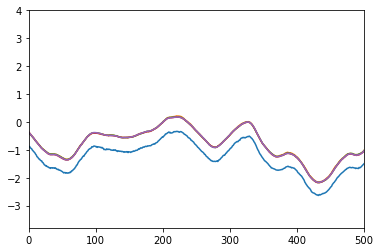

In [6]:
for x in x_list:
    plt.plot(x)
plt.xlim(0,500)

In [7]:
Mean = 10
amp_list = [0.5,1,1.5,2,3]
WNSTA_list = []
ExpSTA_list = []
for amp in amp_list:
    filename = 'diode_WhiteNoise_mean='+str(Mean)+'_amp='+str(amp)+'_11-Aug-2021_0'
    loadfiles = np.load(exp_folder+'STA\\STA_'+filename+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]
    WNSTA_list.append(STA_cell.copy())

    filename = 'diode_OU_tau=500ms_cutoff=1_mean='+str(Mean)+'_amp='+str(amp)+'_11-Aug-2021_0'
    loadfiles = np.load(exp_folder+'STA\\STA_'+filename+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]
    ExpSTA_list.append(STA_cell.copy())

In [8]:
cn = 30